# Imports e Funções

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import matplotlib.patches as mpatches
from google.colab import files
from matplotlib.patches import Patch


In [291]:
# Funções 

def verificar_sexo(row):
  '''Retorna 1 se o sexo for feminino.
     Retorna 0 se o sexo for masculino'''

  if row['Sex'] == 'female':
    return 1
  else:
    return 0

def verificar_1classe(row):
  '''Retorna 1 se o passageiro for da primeira classe.
     Retorna 0 se o passageiro for de outra classe'''

  if row['Pclass'] == 1:
    return 1
  else:
    return 0


def verificar_2classe(row):
  '''Retorna 1 se o passageiro for da segunda classe.
     Retorna 0 se o passageiro for de outra classe'''
  if row['Pclass'] == 2:
    return 1
  else:
    return 0


def regressao(row):
  '''Fórmula de regressão logística. 
     3 = Passageiro Sobreviveria
     2 = Passageiro Morreria
  '''
  if -1.33 + (2.55 * verificar_sexo(row)) + (1.27 * verificar_2classe(row)) + (2.58 * verificar_1classe(row)) - 0.04 * row['Age'] >= 1:
    return 3
  else:
    return 2


def grafico_pizza(dataset, coluna):
  # Criando gráfico de Pizza
  embarques = dataset[coluna].value_counts()
  sns.set_palette("muted")
  sns.set_style("whitegrid")
  f, ax = plt.subplots(figsize=(6,6), sharex=True)

  # Títulos e legendas
 
  if coluna == 'Embarked':
    plt.title('Estações de Embarque')
    labels = ['Southampton', 'Cherbourg', 'Queenstone']
  else:
    plt.title('Classe dos Passageiros')
    labels = ['3ª Classe', '2ª Classe', '1ª Classe']

  plt.pie(x = embarques, labels = labels, autopct='%1.2f%%')

  # Mostrando o gráfico
  plt.show()


def grafico_barras(dataset,coluna):
  # Criando o gráfico de barras
  count_sibsp = dataset[coluna].value_counts()
  graph = sns.countplot(x=coluna, data=dataset)

  if coluna == 'SibSp':
    # Titulos e Legendas
    plt.title('Número de irmãos e Cônjuges')
    plt.ylabel('Count')
    plt.xlabel('SibSp')


  if coluna == 'Parch':
    # Titulos e Legendas
    plt.title('Número de pais e filhos')
    plt.ylabel('Count')
    plt.xlabel('Parch')



  # Mostrando o gráfico
  plt.show()


def grafico_mortos_vivos(database, nome_database=''):
  # Criando o gráfico
  ax = sns.countplot(x='Survived', data=database, palette=['red', 'green'])

  # Adicionando valores de porcentagem em cada barra
  total = float(len(database))
  for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2., height + 3, '{:.2f}%'.format((height/total)*100), ha="center")
  # Titulos e Legendas
  plt.title(f'Sobreviventes e Mortos')
  plt.ylabel('Count')
  plt.xlabel('Survived')
  if nome_database == 'train':
    legend_elements = [Patch(facecolor='red', label='Mortos'),
                        Patch(facecolor='green', label='Sobreviventes')]
    plt.legend(handles=legend_elements, title='Survived')
  elif nome_database == 'test':
    legend_elements = [Patch(facecolor='red', label='Morreriam'),
                    Patch(facecolor='green', label='Sobreviveriam')]
    plt.legend(handles=legend_elements, title='Survived')
  else: 
    legend_elements = [Patch(facecolor='red', label='0 - Morreu\n2 - Morreria'),             
                      Patch(facecolor='green', label='1 - Viveu\n3 - Viveria')]
    plt.legend(handles=legend_elements, title='Survived')


  # Mostrando o gráfico
  plt.show()


def grafico_mortos_classe(database):
  labels = ['1st Class', '2nd Class', '3st Class'] 
  dados = database
  # contando o número de passageiros que sobreviveram e morreram para cada classe
  contagem = dados.groupby(['Pclass', 'Survived']).size().unstack()

  # criando um gráfico de barras empilhadas
  ax = contagem.plot.bar(stacked=True, color=['red','green'])
  ax.set_xticklabels(labels)

  # Mostrando rótulo de %
  total = float(len(dados))
  for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_y()+p.get_height()/2, '{:.2f}%'.format((p.get_height()/total)*100), ha="center")

  # definindo título e legendas
  plt.title('Número de passageiros sobreviventes/mortos por classe')
  plt.xlabel('Classe')
  plt.ylabel('Quantidade')
  plt.xticks(rotation=0)

  plt.legend(['Mortos', 'Sobreviventes'])

  # mostrando o gráfico
  plt.show()

def grafico_mortos_sexo(database):
  labels = ['Feminino', 'Masculino'] 
  dados = database

  # contando o número de passageiros que sobreviveram e morreram para cada sexo
  contagem = dados.groupby(['Sex', 'Survived']).size().unstack()

  # criando um gráfico de barras empilhadas
  ax5 = contagem.plot.bar(stacked=True, color=['red','green'])
  ax5.set_xticklabels(labels)

  # Mostrando rótulo de %
  total = float(len(dados))
  for p in ax5.patches:
    ax5.text(p.get_x()+p.get_width()/2, p.get_y()+p.get_height()/2 + 1, '{:.2f}%'.format((p.get_height()/total)*100), ha="center")

  # definindo título e legendas
  plt.title('Número de passageiros sobreviventes/mortos por sexo')
  plt.xlabel('Sexo')
  plt.ylabel('Quantidade')
  plt.xticks(rotation=0)

  plt.legend(['Morreria', 'Sobreviveria'])

  # mostrando o gráfico
  plt.show()



def grafico_mortos_sexo_join():

  # criando a figura e as subplots
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

  # gráfico 1
  labels = ['Feminino', 'Masculino'] 
  dados = train

  # contando o número de passageiros que sobreviveram e morreram para cada sexo
  contagem = dados.groupby(['Sex', 'Survived']).size().unstack()

  # criando um gráfico de barras empilhadas
  ax1 = contagem.plot.bar(stacked=True, color=['red','green'], ax=ax1)
  ax1.set_xticklabels(labels)

  # Mostrando rótulo de %
  total = float(len(dados))
  for p in ax1.patches:
    ax1.text(p.get_x()+p.get_width()/2, p.get_y()+p.get_height()/2 + 1, '{:.2f}%'.format((p.get_height()/total)*100), ha="center")

  # definindo título e legendas
  ax1.set_title('Train')
  ax1.set_xlabel('Sexo')
  ax1.set_ylabel('Quantidade')
  ax1.set_xticklabels(labels, rotation=0)

  ax1.legend(['Morreu', 'Sobreviveu'])


  # gráfico 2
  labels = ['Feminino', 'Masculino'] 
  dados = test

  # contando o número de passageiros que sobreviveram e morreram para cada sexo
  contagem = dados.groupby(['Sex', 'Survived']).size().unstack()

  # criando um gráfico de barras empilhadas
  ax2 = contagem.plot.bar(stacked=True, color=['red','green'], ax=ax2)
  ax2.set_xticklabels(labels)

  # Mostrando rótulo de %
  total = float(len(dados))
  for p in ax2.patches:
    ax2.text(p.get_x()+p.get_width()/2, p.get_y()+p.get_height()/2 + 1, '{:.2f}%'.format((p.get_height()/total)*100), ha="center")

  # definindo título e legendas
  ax2.set_title('Test')
  ax2.set_xlabel('Sexo')
  ax2.set_ylabel('Quantidade')
  ax2.set_xticklabels(labels, rotation=0)

  ax2.legend(['Morreria', 'Sobreviveria'])

  # ajustando o espaçamento entre as subplots
  fig.tight_layout()

  # mostrando a figura
  plt.show()


def comparacao_classes():

  # Variáveis

  width = 0.6  # the width of the bars: can also be len(x) sequence
  species = ('1ª Classe', '2ª Classe', '3ª Classe')
  colors = ['#FF0000', 'green', '#FFC0CB', '#7FFFD4']

  # Barra 1
  morreu_class1 = base_unificada.loc[(base_unificada['Survived'] == 0) & (base_unificada['Pclass'] == 1)]['Survived'].count()
  viveu_class1 = base_unificada.loc[(base_unificada['Survived'] == 1) & (base_unificada['Pclass'] == 1)]['Survived'].count()
  morreria_class1 = base_unificada.loc[(base_unificada['Survived'] == 2) & (base_unificada['Pclass'] == 1)]['Survived'].count()
  sobreviveria_class1 = base_unificada.loc[(base_unificada['Survived'] == 3) & (base_unificada['Pclass'] == 1)]['Survived'].count()

  # Barra 2
  morreu_class2 = base_unificada.loc[(base_unificada['Survived'] == 0) & (base_unificada['Pclass'] == 2)]['Survived'].count()
  viveu_class2= base_unificada.loc[(base_unificada['Survived'] == 1) & (base_unificada['Pclass'] == 2)]['Survived'].count()
  morreria_class2 = base_unificada.loc[(base_unificada['Survived'] == 2) & (base_unificada['Pclass'] == 2)]['Survived'].count()
  sobreviveria_class2 = base_unificada.loc[(base_unificada['Survived'] == 3) & (base_unificada['Pclass'] == 2)]['Survived'].count()

  # Barra 3
  morreu_class3 = base_unificada.loc[(base_unificada['Survived'] == 0) & (base_unificada['Pclass'] == 3)]['Survived'].count()
  viveu_class3 = base_unificada.loc[(base_unificada['Survived'] == 1) & (base_unificada['Pclass'] == 3)]['Survived'].count()
  morreria_class3 = base_unificada.loc[(base_unificada['Survived'] == 2) & (base_unificada['Pclass'] == 3)]['Survived'].count()
  sobreviveria_class3 = base_unificada.loc[(base_unificada['Survived'] == 3) & (base_unificada['Pclass'] == 3)]['Survived'].count()


  sex_counts = {
      'Morreu': np.array([morreu_class1, morreu_class2, morreu_class3]),
      'Viveu': np.array([viveu_class1, viveu_class2, viveu_class3]),
      'Morreria': np.array([morreria_class1, morreria_class2, morreria_class3]),
      'Sobreviveria': np.array([sobreviveria_class1, sobreviveria_class2, sobreviveria_class3])
  }
  bottom = np.zeros(3)

  # Criando o gráfico
  fig, ax = plt.subplots(figsize=(7,8))

  for cor, (sex, sex_count) in enumerate(sex_counts.items()):
      p = ax.bar(species, sex_count, width, label=sex, bottom=bottom, color=colors[cor])
      bottom += sex_count
      count_labels = [f'{count} \n{count/np.sum(sex_count)*100:.1f}%' for count in sex_count] # cria rótulos com contagem e porcentagem
      ax.bar_label(p, labels=count_labels, label_type='center') # adiciona os rótulos com contagem e porcentagem

  # Títulos e Legenda
  ax.set_title('Comparação Classes - Base Train e Test')
  ax.legend()

  # Mostrando o gráfico
  plt.show()


def comparacao_h_m():

  # Variáveis

  width = 0.6  # the width of the bars: can also be len(x) sequence
  species = ('Morreu', 'Viveu', 'Morreria', 'Sobreviveria')
  colors = ['#FF69B4', '#87CEFA']

  # Barra 1
  morreu_fem = base_unificada.loc[(base_unificada['Survived'] == 0) & (base_unificada['Sex'] == 'female')]['Survived'].count()
  morreu_masc = base_unificada.loc[(base_unificada['Survived'] == 0) & (base_unificada['Sex'] == 'male')]['Survived'].count()

  # Barra 2
  viveu_fem = base_unificada.loc[(base_unificada['Survived'] == 1) & (base_unificada['Sex'] == 'female')]['Survived'].count()
  viveu_masc = base_unificada.loc[(base_unificada['Survived'] == 1) & (base_unificada['Sex'] == 'male')]['Survived'].count()

  # Barra 3
  morreria_fem = base_unificada.loc[(base_unificada['Survived'] == 2) & (base_unificada['Sex'] == 'female')]['Survived'].count()
  morreria_masc = base_unificada.loc[(base_unificada['Survived'] == 2) & (base_unificada['Sex'] == 'male')]['Survived'].count()

  # Barra 4
  sobreviveria_fem = base_unificada.loc[(base_unificada['Survived'] == 3) & (base_unificada['Sex'] == 'female')]['Survived'].count()
  sobreviveria_masc = base_unificada.loc[(base_unificada['Survived'] == 3) & (base_unificada['Sex'] == 'male')]['Survived'].count()

  sex_counts = {
      'Mulheres': np.array([morreu_fem, viveu_fem, morreria_fem, sobreviveria_fem]),
      'Homens': np.array([morreu_masc, viveu_masc, morreria_masc, sobreviveria_masc]),
  }
  bottom = np.zeros(4)

  # Criando o gráfico
  fig, ax = plt.subplots(figsize=(7,8))

  for cor, (sex, sex_count) in enumerate(sex_counts.items()):
      p = ax.bar(species, sex_count, width, label=sex, bottom=bottom, color=colors[cor])
      bottom += sex_count
      count_labels = [f'{count} \n{count/np.sum(sex_count)*100:.1f}%' for count in sex_count] # cria rótulos com contagem e porcentagem
      ax.bar_label(p, labels=count_labels, label_type='center') # adiciona os rótulos com contagem e porcentagem

  # Títulos e Legenda
  ax.set_title('Comparação Homens e Mulheres - Base Train e Test')
  ax.legend()

  # Mostrando o gráfico
  plt.show()


# Contexto



O naufrágio do Titanic é um dos naufrágios mais famosos da história. A 15 de Abril de 1912, durante a sua viagem inaugural, o amplamente considerado " inafundável" RMS Titanic afundou-se após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidades de sobreviver do que outros.

Neste desafio, pedimos que você gere, baseado no que aprendeu até o momento, algumas informações para que possamos analisar e responder à pergunta: "que tipos de pessoas tinham mais probabilidades de sobreviver", utilizando dados sobre passageiros (ou seja, nome, idade, sexo, classe socioeconómica etc.)

Você terá acesso a dois conjuntos de dados semelhantes que incluem informações sobre passageiros como nome, idade, sexo, classe social, etc. Um conjunto de dados intitula-se train.csv e o outro test.csv.

Train.csv conterá os detalhes de um subconjunto dos passageiros a bordo (891 para ser exato) e, mais importante ainda, revelará se sobreviveram ou não, também conhecido como a "verdade em terra".

O conjunto de dados test.csv contém informações semelhantes, mas não revela a "verdade em terra" para cada passageiro. 
Utilizando os padrões encontrados nos dados do train.csv, queremos que você veja se é possível indicar nos outros 418 passageiros a bordo (encontrados em test.csv) quais sobreviriam!

Para sugerir a chance de sobrevivência na base de treino vamos usar uma regra de regressão logística:

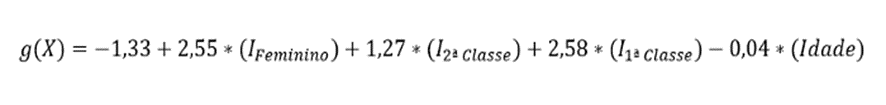

Em caso, o resultado da regressão seja maior ou igual a 1 esta pessoa “SOBREVIVERIA”.
  
    


As bases utilizadas podem ser encontradas no meu link do [Github](https://github.com/viniciusperdigao/LeegaAcademy) 




Inicialmente vamos importar a base de dados. 

In [4]:
# Importando as bases de dados.

test = pd.read_csv('https://raw.githubusercontent.com/viniciusperdigao/LeegaAcademy/main/test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/viniciusperdigao/LeegaAcademy/main/train.csv')

Após realizar a importação podemos dar uma analisada de como que está a base dos dados. 

In [5]:
# Verificando a base Train
train.info()
print()
# Verificando a base Train test
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass 

Umm... Dando uma olhada nos dados podemos observar que não temos a coluna *'Survived'* na base de test. Então vamos cria-la!

In [6]:
# Criar uma nova coluna 'Survived' para a base train.

test.insert(loc=1, column='Survived', value = np.nan)

Ao analisarmos as bases de dados, percebemos que existem dados faltantes nas colunas 'Age' e 'Cabin'. 

Embora a coluna 'Cabin' não afete nossa análise inicialmente, os dados faltantes na coluna 'Age' precisam ser tratados, uma vez que temos um número significativo de campos em branco na base train (177) e na base test (86) e utilizamos estes dados em nossa regressão.
É fundamental que os dados faltantes sejam tratados para garantir uma análise mais precisa e evitar possíveis vieses ou erros em nosso modelo. Existem diversas técnicas que podem ser aplicadas para lidar com dados faltantes, e é importante avaliar qual delas é mais adequada ao nosso contexto antes de realizar o tratamento dos dados.


Ao analisarmos o dicionário de dados, notamos que:
* A idade pode ser fracionária se for inferior a 1 
* Se a idade for estimada, pode ser apresentada na forma de xx,5

No nosso caso, para preencher os valores faltantes na coluna 'Age', usaremos a média das idades agrupadas por sexo.





In [7]:
# Calcular média de idade por sexo
media_por_sexo_train = train.groupby('Sex')['Age'].mean().apply(math.ceil)
media_por_sexo_test = test.groupby('Sex')['Age'].mean().apply(math.ceil)

# Imprimir média por sexo
print('Base Histórica')
print(media_por_sexo_train)
print()
print('Base Prevista')
print(media_por_sexo_test)

Base Histórica
Sex
female    28
male      31
Name: Age, dtype: int64

Base Prevista
Sex
female    31
male      31
Name: Age, dtype: int64


Agora vamos atribuir os valores médios encontrados em nossa base de train e test.

In [8]:
# Atribuindo a média de idade aos campos vazios da coluna idade.
train['Age'] = train.apply(lambda x: media_por_sexo_train[x['Sex']] if pd.isna(x['Age']) else x['Age'], axis=1)
test['Age'] = test.apply(lambda x: media_por_sexo_test[x['Sex']] if pd.isna(x['Age']) else x['Age'], axis=1)

Com a base de dados regularizada, podemos aplicar a regressão logística para determinar se um passageiro sobreviveria ou morreria. 

Neste caso, consideraremos que:

* 2 = o passageiro morreria
* 3 = o passageiro sobreviveria

In [9]:
# Aplica o resultado função de regressão à coluna Survived.
test['Survived'] = test.apply(regressao , axis=1)


Ótimo! Agora podemos dar uma olhada como que ficaram nossas bases. 

In [10]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,2,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,2,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,2,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,2,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para facilitar, vamos unir as bases de teste e treinamento em um único DataFrame. 

Chamaremos este novo DataFrame de __base unificada__, a partir do qual faremos nossas análises.


In [12]:
# União das bases e criação do arquivo em .csv.
base_unificada = pd.concat([train, test])
base_unificada.to_csv('base_unificada.csv', index=False)

Download da nova base de dados: 

In [13]:
files.download('base_unificada.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Análises e Gráficos

Com a nossa base ajustada, podemos agora realizar algumas análises para avaliar o nosso modelo de teste e a base histórica.

Vamos dar uma olhada na relação das estações de embarque.

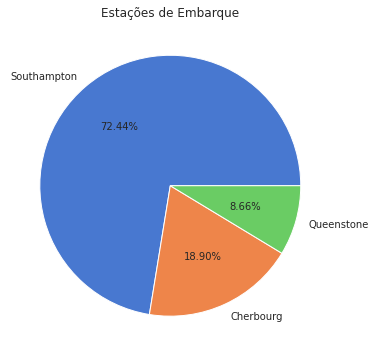

In [278]:
# Gerando gráfico de pizza para a base Train
grafico_pizza(train,'Embarked')

De acordo com os dados apresentados, 72,44% dos embarques ocorrem em Southampton, enquanto 18,90% ocorrem em Cherbourg e os 8,66% restantes em Queenstone. Essa informação pode ser facilmente visualizada no gráfico de pizza, onde a fatia correspondente à Southampton  é maior que as outras duas fatias, o que indica que ela é responsável pela maior parte dos embarques.

Agora, dos passageiros embarcados, a qual classe eles pertenciam?

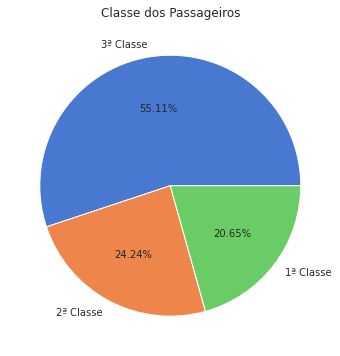

In [292]:
# Gerando gráfico de pizza para a base Train
grafico_pizza(train,'Pclass')

Com base no gráfico apresentado, é possível observar que a maioria dos tripulantes pertencia à terceira classe, com uma fatia que representava mais da metade da tripulação, totalizando 55,11%. Os demais tripulantes estavam divididos entre 24,24% na segunda classe e 20,65% na primeira classe.

Também podemos examinar o número de irmãos/cônjuges a bordo do navio e sua distribuição por classe, conforme mostrado no gráfico. 


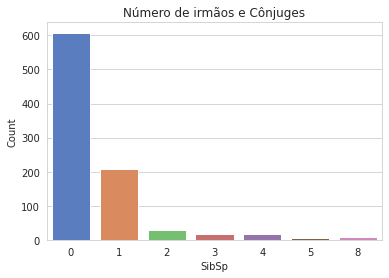

In [295]:
grafico_barras(train,'SibSp')

Ao analisar o gráfico, é possível constatar que a maioria dos passageiros a bordo não possuía parentesco entre si. Dos passageiros presentes, 608 não tinham irmãos ou cônjuges a bordo, o que representa 68,24% do total. Já os passageiros com 1 cônjuge ou irmão a bordo somavam 209, representando 23,45%. O restante estava dividido entre aqueles com 2 ou mais irmãos e cônjuges a bordo.

Podemos ver também a relação de pais/filhos a bordo do Navio

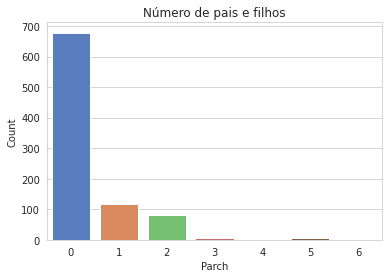

In [296]:
grafico_barras(train,'Parch')

Ao analisarmos os dados, podemos observar que a maioria dos passageiros a bordo viajava sem a companhia de pais ou filhos, totalizando 678 registros, o que representa 76,09% da tripulação do navio. Outros 118 passageiros estavam acompanhados de pelo menos um pai ou filho, representando 13,24% da tripulação. Já 80 passageiros estavam com pelo menos dois pais ou filhos a bordo, correspondendo a 8,97% da tripulação. Os demais tripulantes estavam acompanhados de três ou mais filhos ou pais.

Agora vamos observar o gráfico que apresenta a distribuição de passageiros por idade, agrupados em faixas de 10 anos, juntamente com a média de idade dos passageiros.

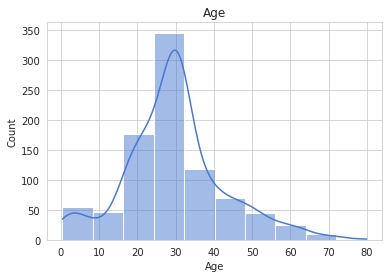

In [18]:
sns.histplot(data=train, x=train.Age, bins=10, kde=True, label='Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')

plt.show()

A maioria dos tripulantes tem idade entre 20 e 40 anos.




Ótimo! Vamos agora analisar o número de sobreviventes e mortos entre todos os tripulantes do navio em nossa base histórica

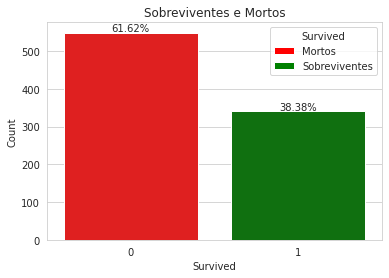

In [297]:
# Gráfico de mortos e sobreviventes para base train.
grafico_mortos_vivos(train, 'train')

Podemos ver que 61,62% da tripulação morreu ou seja, 549 pessoas e 342 pessoas sobreviveram. 

Ok! Agora vamos analisar o número de sobreviventes e mortos entre todos os tripulantes do navio em nossa base de testes.

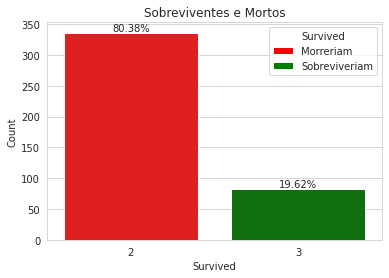

In [299]:
# Gráfico de mortos e sobreviventes para base test.
grafico_mortos_vivos(test,'test')

Impressionante! Infelizmente, 80,38% dos tripulantes não sobreviveram, o que representa um total de 336 passageiros da base de dados, enquanto apenas 19,62% dos passageiros sobreviveriam.

Vamos dar uma olhada nessas informações juntas.

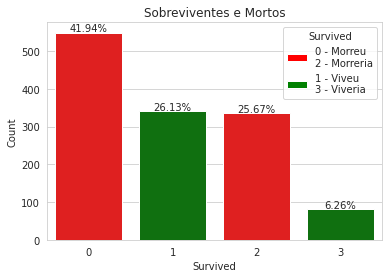

In [21]:
grafico_mortos_vivos(base_unificada,'Base Unificada')


Vamos dar uma olhada agora na distribuição dos passageiros que morreram ou sobreviveram por sexo em nossa base histórica.

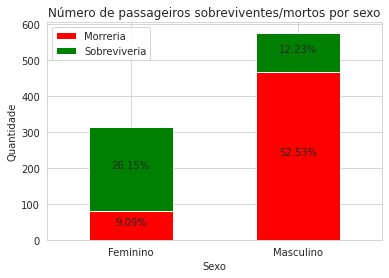

In [198]:

grafico_mortos_sexo(train)

De acordo com as informações disponíveis, havia um total de 577 homens e 314 mulheres a bordo. A análise do gráfico nos mostra que a porcentagem de sobreviventes do sexo feminino foi maior, representando 26,15% do total de passageiros. Por outro lado, apenas 12,23% dos homens a bordo sobreviveram à tragédia.

Bom, vamos ver como está a situação em nossa base de test.

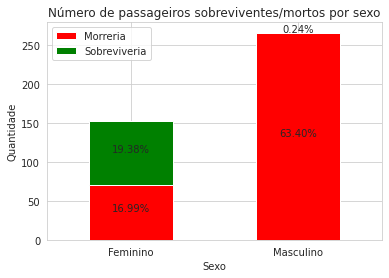

In [301]:
grafico_mortos_sexo(test)

Caramba! Analisando a base de testes, constatamos que apenas 1 homem, o que representa 0,24% dos passageiros, teria sobrevivido. Além disso, cerca de 63,40% dos homens morreriam. No caso das mulheres, teríamos uma porcentagem maior de sobreviventes, com 19,38% conseguiriam sobreviver, enquanto 16,99% morreriam.

Podemos ver agora o gráfico abaixo a representação da comparação entre a base história e a base de teste.

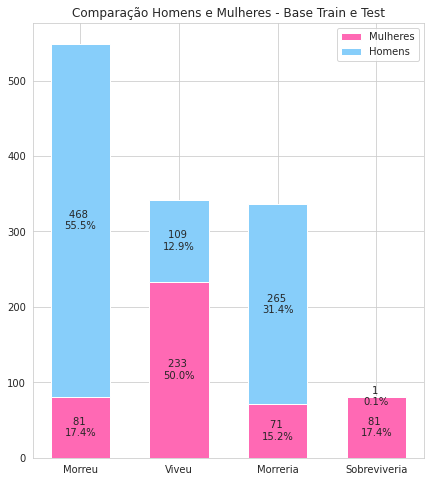

In [277]:
comparacao_h_m()

Ótimo! Agora vamos analisar a relação entre os passageiros e as classes que cada um ocupava no navio.

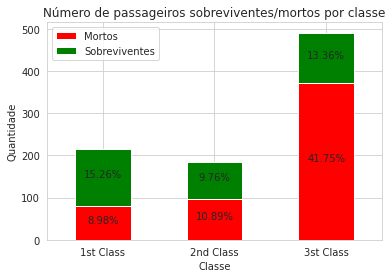

In [302]:
grafico_mortos_classe(train)

Analisando nossa base histórica, podemos perceber que a taxa de sobrevivência foi maior entre os passageiros da primeira classe. Dos 216 passageiros dessa classe, apenas 15,26% sobreviveram. Já na segunda classe, dos 184 passageiros, somente 9,76% conseguiram sobreviver. A terceira classe, por sua vez, apresentou a maior taxa de mortos no navio: dos 491 passageiros, apenas 13,36% conseguiram sobreviver.

Vamos ver a nossa base de test.

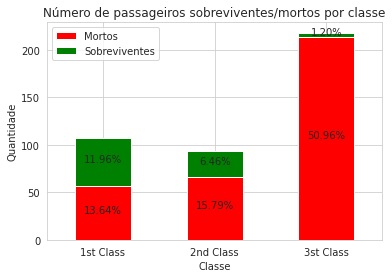

In [303]:
grafico_mortos_classe(test)

Dando uma olhada podemos ver que tivemos um resultado similar para os passageiros da primeira classe onde verificamos que em nossa base histórica que a maioria dos sobreviventes estavam na primeira classe. Tivemos um resultado de 11,93% de passageiros que sobreviveriam na primeira classe, 6,46% de passageiros que sobreviveriam na segunda classe e apenas 1,20% dos passageiros sobreviveriam na terceira classe.

Podemos dar uma olhada agora na comparação destas informações por classe no gráfico abaixo:

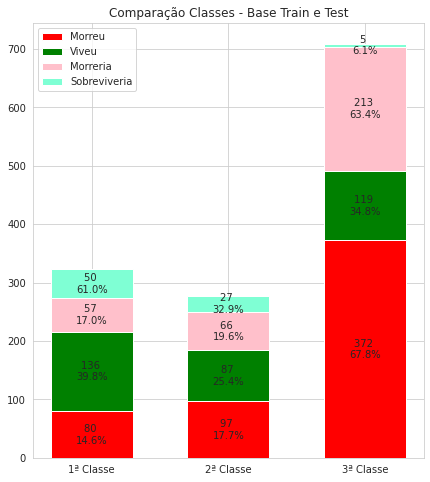

In [275]:
comparacao_classes()